# Data Exploration and Visualization

In [1]:
import os
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt 
import datetime

In [2]:
os.getcwd()

'/Users/gwynethvolkmann'

In [3]:
path = path = '/Users/gwynethvolkmann/Downloads/ultimate_challenge'
os.chdir(path) 

In [4]:
os.getcwd()

'/Users/gwynethvolkmann/Downloads/ultimate_challenge'

In [5]:
df = pd.read_json('ultimate_data_challenge.json')

In [6]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [8]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [10]:
data_date = df['last_trip_date'].max()

In [11]:
print(data_date)

2014-07-01 00:00:00


The data for this project was taken on July 1st, so users that took rides from June 1st - July 1st would count as retained users. 

In [12]:
retained_date = datetime.datetime(2014, 6, 1)

In [13]:
df['retained'] = (df.last_trip_date > retained_date).astype('int') 

In [14]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [15]:
df['retained'].value_counts()

0    31690
1    18310
Name: retained, dtype: int64

In [16]:
retained_user = df[df['retained'] == 1]
not_retained_user = df[df['retained'] == 0]

In [17]:
print(retained_user.count())

city                      18310
trips_in_first_30_days    18310
signup_date               18310
avg_rating_of_driver      16742
avg_surge                 18310
last_trip_date            18310
phone                     18180
surge_pct                 18310
ultimate_black_user       18310
weekday_pct               18310
avg_dist                  18310
avg_rating_by_driver      18276
retained                  18310
dtype: int64


In [18]:
len(retained_user)/(len(retained_user) + len(not_retained_user))

0.3662

36.62% of the users can be classified as retained. 

In [19]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
retained                     0
dtype: int64

In [20]:
df['avg_rating_of_driver'].value_counts()

5.0    20771
4.0     4193
4.5     2498
4.8     2430
4.7     1945
4.9     1771
4.3     1487
4.6     1143
3.0     1003
4.4      829
4.2      601
3.5      488
3.8      428
4.1      398
3.7      364
1.0      256
3.9      255
2.0      209
3.3      201
3.6      172
3.4      108
2.5       94
3.2       53
2.7       47
3.1       39
2.8       28
2.3       22
2.9       13
2.6       12
2.1        6
1.5        4
2.4        3
1.8        2
1.7        2
2.2        1
1.6        1
1.9        1
Name: avg_rating_of_driver, dtype: int64

The most common rating for drivers by far is 5.0 with almost 21,000 ratings at that number so I will fill in missing values with this number.

In [21]:
df['avg_rating_of_driver'].fillna(5, inplace=True)

In [22]:
df['phone'].fillna('Unknown', inplace=True)

In [23]:
df['avg_rating_by_driver'].value_counts()

5.0    28508
4.8     4537
4.7     3330
4.9     3094
4.5     2424
4.6     2078
4.0     1914
4.3     1018
4.4      860
3.0      602
4.2      342
3.5      199
3.7      195
1.0      181
2.0      126
4.1      125
3.8      111
3.3       47
3.9       41
2.5       31
3.6       19
3.4        5
1.5        4
2.8        3
3.2        2
2.7        2
2.3        1
Name: avg_rating_by_driver, dtype: int64

Once again the rating is overwhelmingly a 5, so I will fill in the missing values in this column with a 5. 

In [24]:
df['avg_rating_by_driver'].fillna(5, inplace=True)

In [25]:
df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
retained                  0
dtype: int64

Before looking at the relationship between the variables, I am going to make the categorical variables into dummies
so that they can be evaluated. 

In [26]:
dummies = pd.get_dummies(df[['city','phone']])
second_df = pd.concat([df,dummies], axis=1)
second_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


In [27]:
second_df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
retained                           int64
city_Astapor                       uint8
city_King's Landing                uint8
city_Winterfell                    uint8
phone_Android                      uint8
phone_Unknown                      uint8
phone_iPhone                       uint8
dtype: object

In [28]:
second_df['ultimate_black_user'] = second_df['ultimate_black_user'].replace({True:1, False:0})

In [29]:
second_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


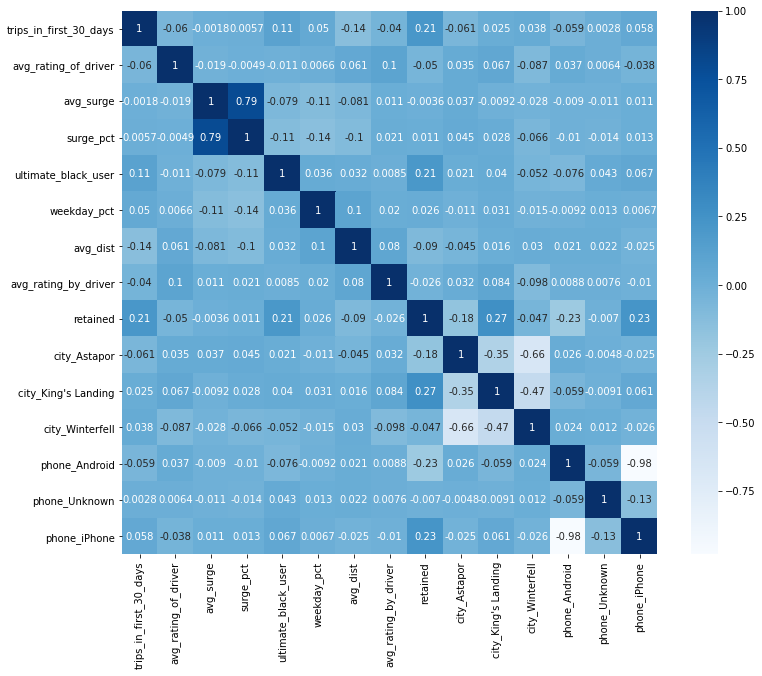

In [30]:
plt.figure(figsize=(12,10))
p=sns.heatmap(second_df.corr(), annot=True,cmap ='Blues')

Based on the heatmap correlation, some of the variables I am interested in exploring further are the type of phone the user has, the city they are located in, the number of trips they took in the first 30 days and whether thay are an ultimate black user. 

<AxesSubplot:xlabel='retained', ylabel='avg_dist'>

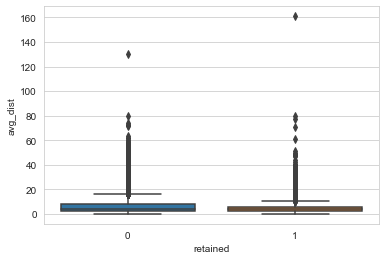

In [31]:
sns.set_style('whitegrid')
sns.boxplot(x= 'retained', y='avg_dist', data = df)

<AxesSubplot:xlabel='retained', ylabel='avg_dist'>

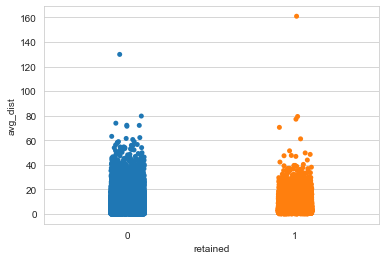

In [32]:
sns.stripplot(x='retained', y='avg_dist', data= second_df)

I instictively think that average distance will be very influential as to whether users are retained or not. Although this boxplot shows a small amount of difference, once I have built a model I will see how important this particular feature is. There seems to be some slight evidence from this preliminary examination that lower average distances for rides may lead to greater rider retention. 

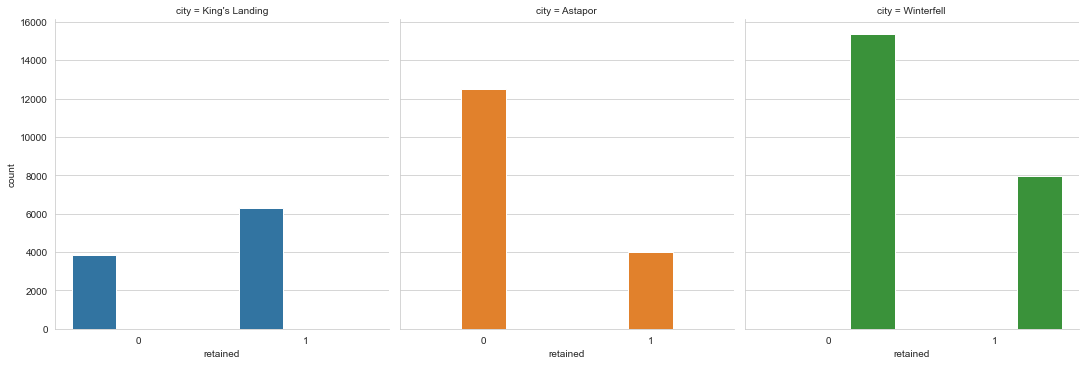

In [33]:
sns.set_style('whitegrid')
sns.catplot(x= 'retained', col='city', hue='city', data = df[df.city.notnull()], kind='count')

In King's Landing there was a larger proportion of users that were retained versus those that were not retained. The opposite is true for the cities of Astapor and Winterfell. There are still more retained userd in Winterfell than in King's Landing however. 

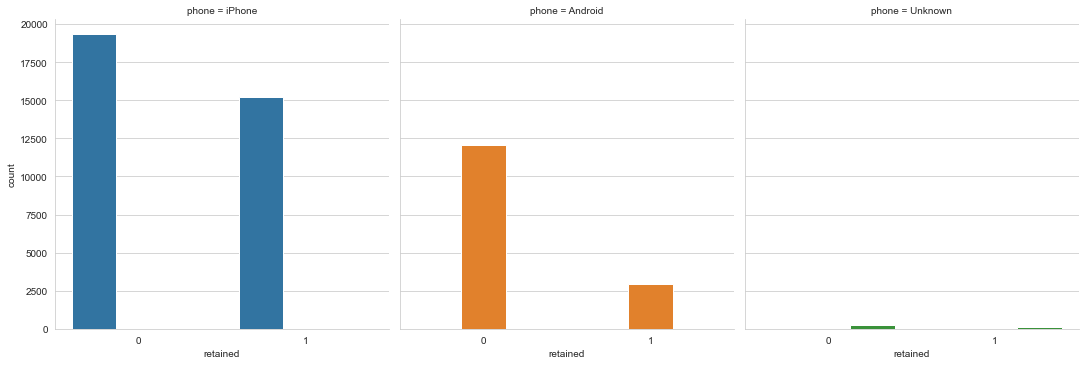

In [34]:
sns.catplot(x= 'retained', col='phone', hue='phone', data = df[df.phone.notnull()], kind='count')

There are more iPhones using the service than Androids. The proportion of iPhone users that are retained seems to be higher than the proportion of Android users that are retained. 

# Building a Machine Learning Algorithm

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.preprocessing import StandardScaler

In [36]:
X = second_df.drop(['city', 'phone', 'retained','signup_date','last_trip_date'], axis=1)
y = second_df['retained']

In [37]:
scaler = StandardScaler()
x = second_df[['trips_in_first_30_days','avg_rating_of_driver','avg_surge','surge_pct','weekday_pct', 'avg_dist', 
              'avg_rating_by_driver']].values
x_scaled = scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
                                            'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'])

In [38]:
df_model = pd.DataFrame({'retained': second_df['retained'].values})
df_model.head()

,retained
0,1
1,0
2,0
3,1
4,0


In [39]:
df_model2 = pd.concat([df_model, df_scaled], axis=1)
df_model2.head()

,retained,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
0,1,0.453984,0.057759,0.113506,0.328202,-0.397131,-0.372650,0.495437
1,0,-0.600689,0.571657,-0.336268,-0.443394,-0.294653,0.431583,0.495437
2,0,0.190316,-0.627439,-0.336268,-0.443394,1.053741,-0.880771,0.495437
3,1,1.772325,-0.113541,0.293416,0.558679,0.514383,-0.602181,0.271207
4,0,3.090665,-0.456139,0.518303,0.147829,0.579106,-0.467266,0.271207


In [40]:
df_other = second_df.filter(["city_King's Landing", "city_Astapor", "city_Winterfell","phone_Android","phone_Unknown",
                            "phone_iPhone","ultimate_black_user"], axis=1)
df_other.head()

,city_King's Landing,city_Astapor,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user
0,1,0,0,0,0,1,1
1,0,1,0,1,0,0,0
2,0,1,0,0,0,1,0
3,1,0,0,0,0,1,1
4,0,0,1,1,0,0,0


In [41]:
df_model3 = pd.concat([df_model2, df_other], axis=1)
df_model3.head()

,retained,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Astapor,city_Winterfell,phone_Android,phone_Unknown,phone_iPhone,ultimate_black_user
0,1,0.453984,0.057759,0.113506,0.328202,-0.397131,-0.372650,0.495437,1,0,0,0,0,1,1
1,0,-0.600689,0.571657,-0.336268,-0.443394,-0.294653,0.431583,0.495437,0,1,0,1,0,0,0
2,0,0.190316,-0.627439,-0.336268,-0.443394,1.053741,-0.880771,0.495437,0,1,0,0,0,1,0
3,1,1.772325,-0.113541,0.293416,0.558679,0.514383,-0.602181,0.271207,1,0,0,0,0,1,1
4,0,3.090665,-0.456139,0.518303,0.147829,0.579106,-0.467266,0.271207,0,0,1,1,0,0,0


In [42]:
X = df_model3.drop(['retained'], axis=1)
y = df_model3['retained']

In [43]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0, stratify = y)

In [44]:
regression_model = LogisticRegression()
regression_model.fit(X, y)
y_predicted = regression_model.predict(X_test)

In [45]:
log_odds = regression_model.coef_[0]
pd.DataFrame(log_odds, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
ultimate_black_user,0.901961
city_King's Landing,0.792303
trips_in_first_30_days,0.457376
phone_iPhone,0.378059
surge_pct,0.083906
weekday_pct,0.038914
avg_surge,-0.041149
avg_rating_by_driver,-0.068032
avg_rating_of_driver,-0.084851
avg_dist,-0.206496


The coefficient values for this model indicate that the most important variables that influence whether a user is retained or not are whether they are an ultimate black user, whether they have an iphone or and Android, the number of trips taken in the first 30 days, and the city that they live in. These variables all make sense as variables like phone model can influence user experience and the city one lives in can have an impact on how useful a car service is. For example in cities with robust public transport, car services may not retain as many users. 

Next I will evaluate the model to see how well it performed.

In [46]:
print(confusion_matrix(y_test, y_predicted))

[[6879 1044]
 [2317 2260]]


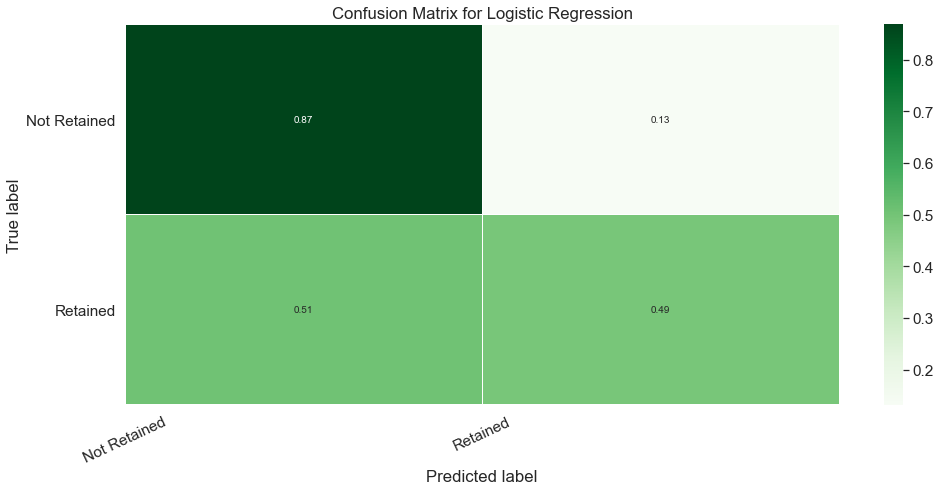

In [48]:
matrix = confusion_matrix(y_test, y_predicted)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Not Retained', 'Retained']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [49]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      7923
           1       0.68      0.49      0.57      4577

    accuracy                           0.73     12500
   macro avg       0.72      0.68      0.69     12500
weighted avg       0.72      0.73      0.72     12500



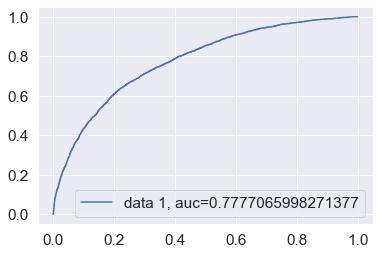

In [50]:
y_pred_proba = regression_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The precision and recall scores for class 0 are good, however the precision and recall scores for class 1 are low as summarized by the f1 score. The ROC curve shows that the model balances the true positives and false positive fairly well. It is higher than 0.5 certainly. I will next tray a Random Forest Classifier to see if that model has a better performance.

In [51]:
clf = RandomForestClassifier(n_estimators=100, random_state = 1,n_jobs=-1)
forest_model = clf.fit(X, y)

In [52]:
y_pred_forest = forest_model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred_forest)

0.99304

This model has a very high degree of accuracy, however I will explore the data further to see how well it performed for each class. 

In [54]:
confusion_matrix(y_test, y_pred_forest)

array([[7895,   28],
       [  59, 4518]])

The confusion matrix shows that the model actually classified the data very well. The number of correctly predicted labels is very high. I will graph these values in order to visualize them more easily.

In [55]:
matrix = confusion_matrix(y_test, y_pred_forest)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

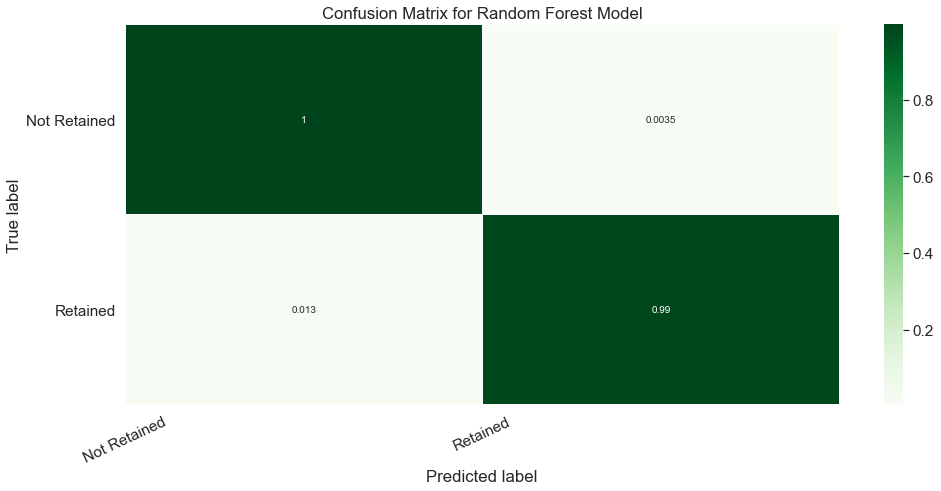

In [56]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Not Retained', 'Retained']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [57]:
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7923
           1       0.99      0.99      0.99      4577

    accuracy                           0.99     12500
   macro avg       0.99      0.99      0.99     12500
weighted avg       0.99      0.99      0.99     12500



14


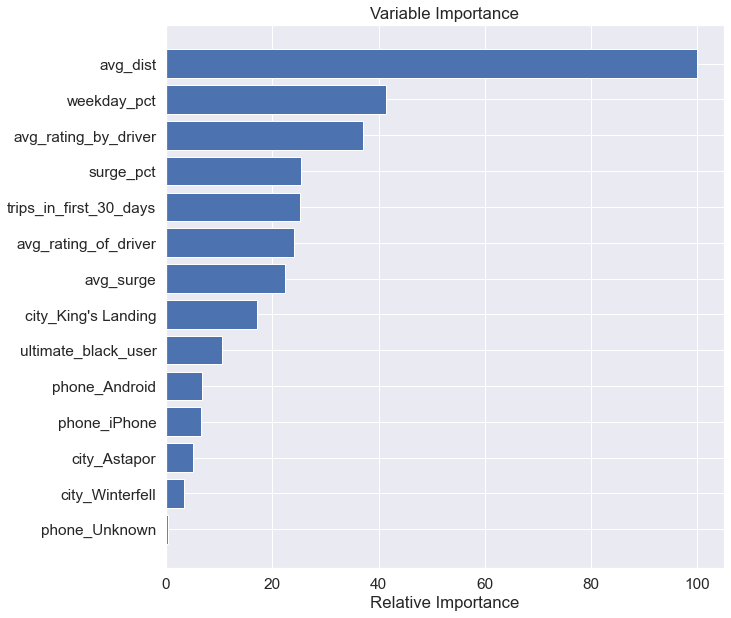

In [58]:
feature_importance = clf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

For the Random Forest model, the most important features were the average distance of the ride, the percent of trips that happened during a weekday and the average rating given by the driver. This model performed well and is the model I would recommend to Ultimate. 

# Leveraging Insights

Based on my analysis, some of the factors that influece whether users are retained include, the length of the trip, with shorter trip averages being more likely to retain users, phone type, with iPhone users being more likely to be retained, the number of trips taken in the first 30 days, and whether users have ultimate black. Ultimate could examine the user experience for the iPhone versus the Android app and see if there is a usability issue that impacts Android users. Ultimate could also incentivize shorter trips, or provide free or discounted trips to users within the first 30 days. Ultimate black could also be incentivized through reduced rates or discounts. These measures would need to be analyzed for profitability however. 